In [2]:
# for upload from local drive(cameraman.jpg)
from google.colab import files
src = list(files.upload().values())[0]

Saving cameraman.jpg to cameraman.jpg
Saving lena.bmp to lena.bmp


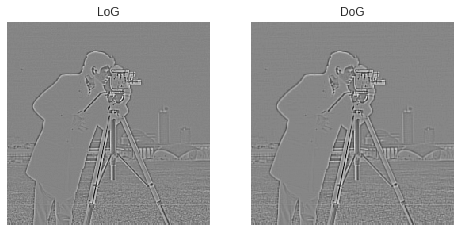

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
filename = 'cameraman.jpg'
img = plt.imread(filename)

# gaussian filter for LoG
g_filter = cv2.getGaussianKernel(ksize=3, sigma=0.6)
g_filter = g_filter * g_filter.T

# Make laplacian filter
l_filter = np.array([[1, 1, 1],
                   [1,  -8, 1],
                   [1, 1, 1]])

# 2 gaussian filter for DoG
g1_filter = cv2.getGaussianKernel(ksize=3, sigma=1.6)
g1_filter = g1_filter * g1_filter.T
g2_filter = cv2.getGaussianKernel(ksize=3, sigma=1)
g2_filter = g2_filter * g2_filter.T

# 1st, apply smooth
blur_dst = cv2.filter2D(img, -1, g_filter)

# lab1-1 LoG filter
LoG = cv2.filter2D(blur_dst, cv2.CV_64F, l_filter)
# lab1-2 DoG filter
DoG = cv2.filter2D(blur_dst,  cv2.CV_64F, g1_filter - g2_filter)


# lab1-3 Plot images(LoG vs DoG), sigma = 0.6 kernel size = 3
plt.subplot(121), plt.imshow(LoG, cmap="gray") , plt.title('LoG')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(DoG, cmap="gray") , plt.title('DoG')
plt.xticks([]), plt.yticks([])
plt.show()